## Data Description:-

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market,
it is a component of the marketing mix that cannot be ignored.
                              The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel

## Target

To predict the total sales generated from all the sales channel.  

## Importing Libraries

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [204]:
Advertising = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv") 
# Loading of 'Advertising.csv' data file in 'Advertising" dataframe

In [205]:
Advertising.columns  # defining the columns in the 'Advertising' dataframe.

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [206]:
Advertising.head()  # to get first five values from the Advertising.csv dataset.

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


As per the data the sales percentage of Tv is higher than the other fields.

### Checking the Datatypes of the Columns

In [207]:
Advertising.dtypes   # datatype description

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

TV, radio,newspaper,sales all are continuous in nature.

### Exploratory Data Analysis (EDA)

In [208]:
Advertising.shape   # to get the no. of rows and columns in the Advertising dataset

(200, 5)

In [209]:
Advertising.info()   # information about the dataframe Advertising with the column names, not null counts and datatypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Data Cleaning

In [210]:
# Checking Null values
Advertising.isnull().sum()*100/Advertising.shape[0]
# There are no NULL values in the dataset, hence it is clean.

Unnamed: 0    0.0
TV            0.0
radio         0.0
newspaper     0.0
sales         0.0
dtype: float64

###  Checking Outliers 
An Outlier is a data-item/object that deviates significantly from the rest of the objects.

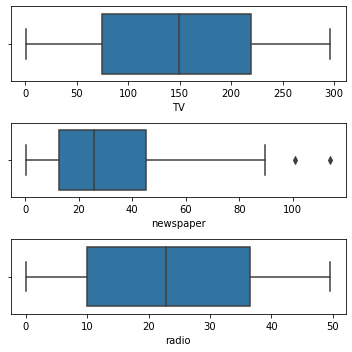

In [211]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(Advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(Advertising['newspaper'], ax = axs[1])
plt3 = sns.boxplot(Advertising['radio'], ax = axs[2])
plt.tight_layout()

From the above outliers graph, we have seen that there is no outlier in the field TV and radio. Outliers are present only in the field newspaper.

### Sales (Target Variable)

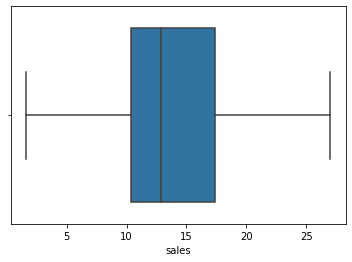

In [212]:
sns.boxplot(Advertising['sales'])
plt.show()

No outlier present.

### Data Visualization using Scatter plotting

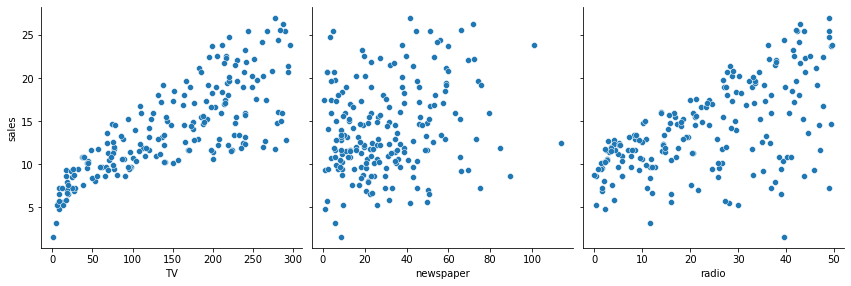

In [213]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(Advertising, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

### Data Visualization using histogram

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'TV'}>],
       [<AxesSubplot:title={'center':'radio'}>,
        <AxesSubplot:title={'center':'newspaper'}>],
       [<AxesSubplot:title={'center':'sales'}>, <AxesSubplot:>]],
      dtype=object)

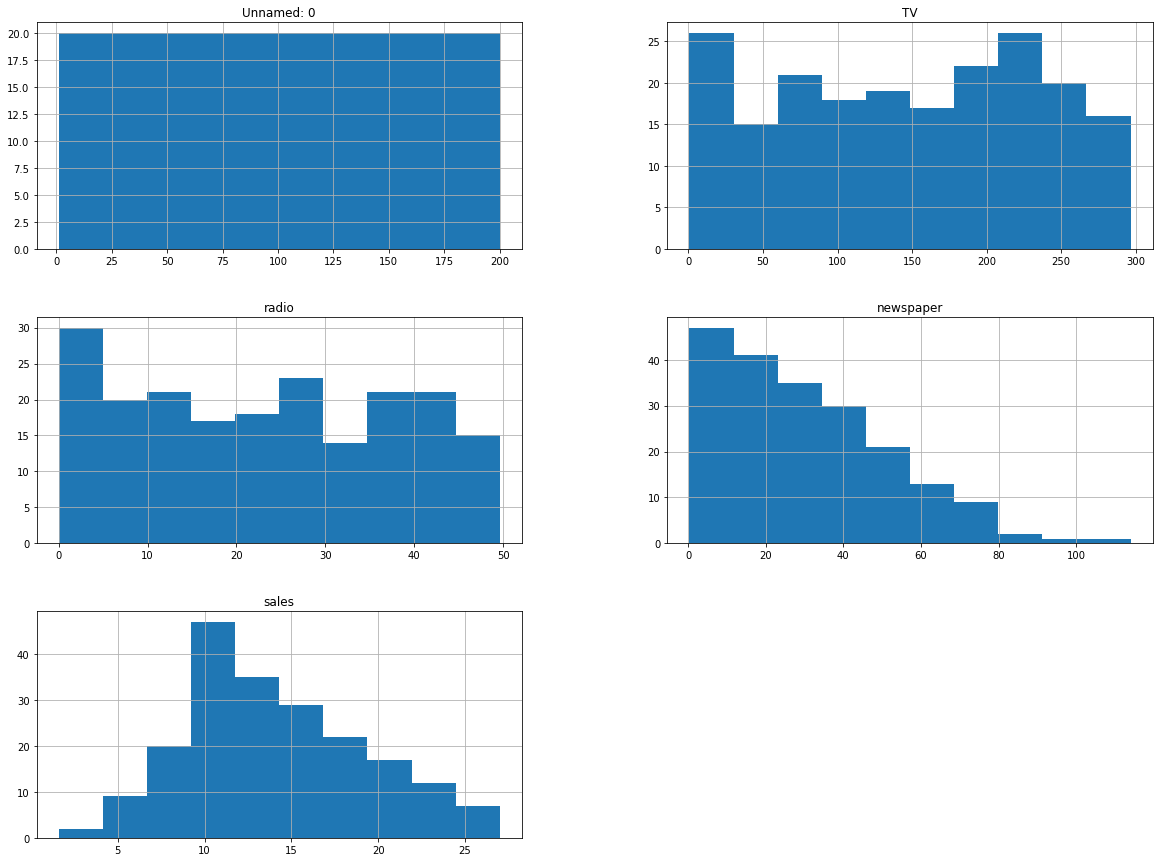

In [214]:
Advertising.hist(figsize=(20,15))

As per the histographs, it is clear that the sale of TV is much more than the sales of radio and newspaper, predicted in between 210-250
and the sales of radio is less as compare to TV. 

### Encoding of Dataframe

In [215]:
enc= OrdinalEncoder()
#The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features.

In [216]:
for i in Advertising.columns:
    if Advertising[i].dtypes== "object":
        Advertising[i]=enc.fit_transform(Advertising[i].values.reshape(-1,1)) # reshape the values present in the Advertising dataframe.

In [217]:
Advertising  # print the values after reshaping

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [218]:
Advertising.describe() # describe the values according to the mean, min and max counts.

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


From the above tables it is observed that the outlets have been operating from sales, on an average the outlets have been running , with last one sales i.e 27.

The average sales of the items is 12.90 and 50% of the items has been sold..


### Describing the columns according to the mean, max and min counts using heatmap.

<AxesSubplot:>

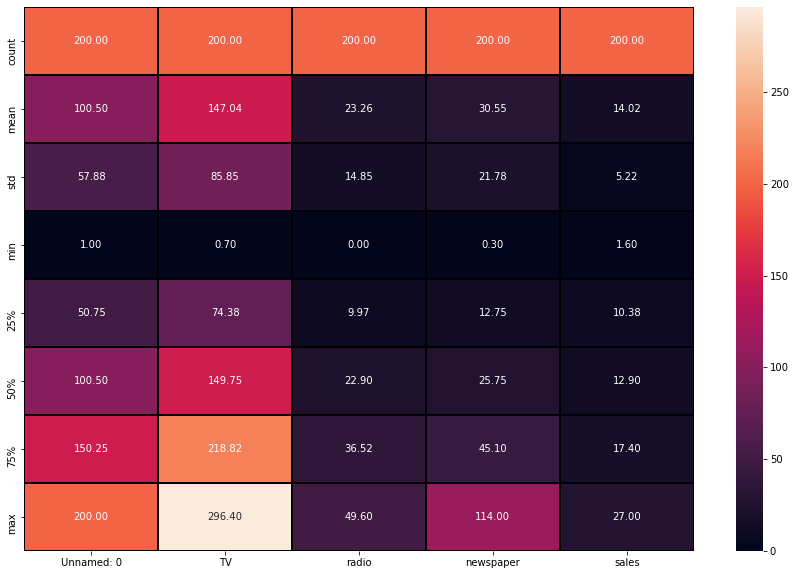

In [219]:
plt.figure(figsize = (15,10))
sns.heatmap(Advertising.describe(), annot=True ,linewidths = 0.5, linecolor="black", fmt = '0.2f' )

### Visualizing Correlation using heap map

<AxesSubplot:>

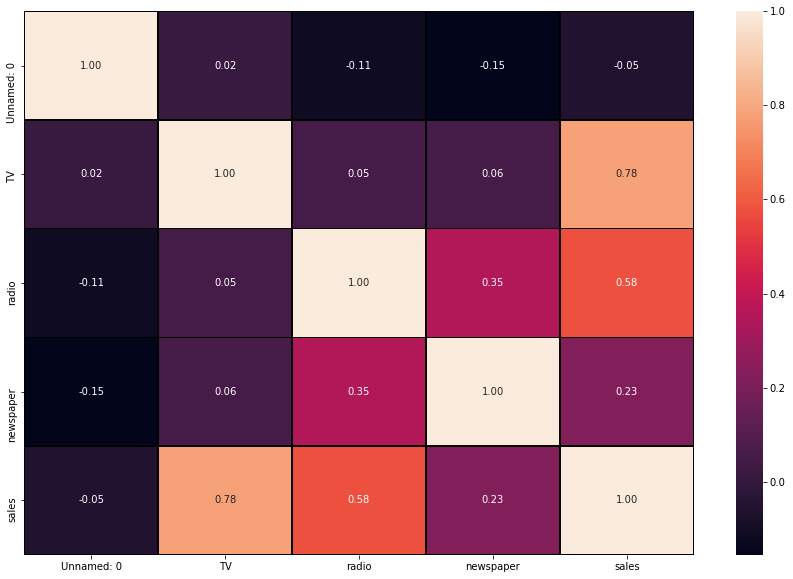

In [220]:
# Let's see the correlation between different variables.
corr = Advertising.corr()
plt.subplots(figsize = (15,10))
sns.heatmap(corr, annot=True ,linewidths = 0.5, linecolor="black", fmt = '0.2f' )

### Feature Importance

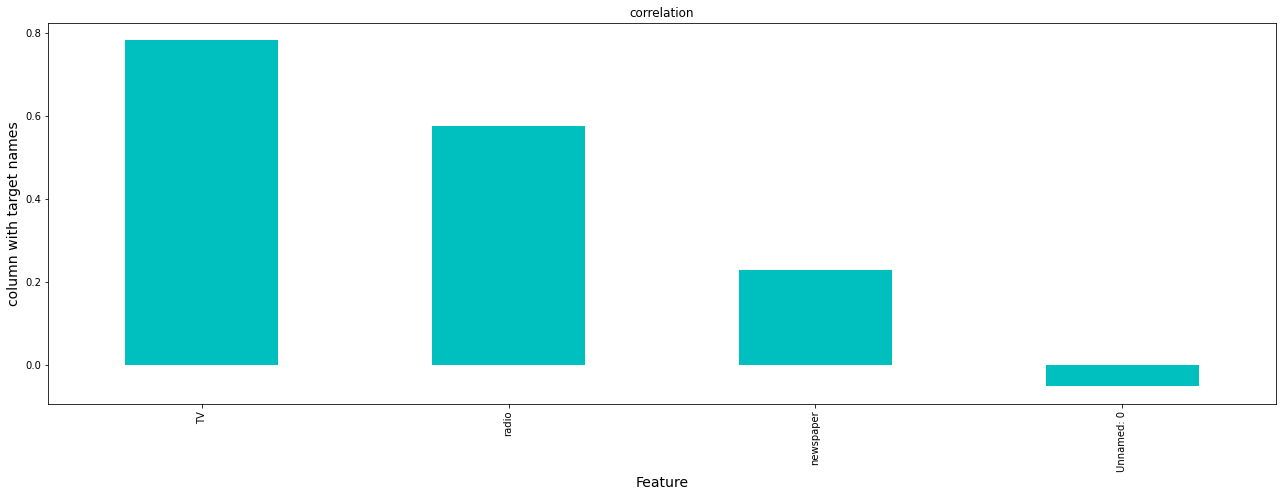

In [221]:
plt.figure(figsize=(22,7))
Advertising.corr()['sales'].sort_values(ascending = False).drop(['sales']).plot(kind='bar', color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("column with target names",fontsize=14)
plt.title('correlation')
plt.show()

### Checking Skewness

In [222]:
Advertising.skew()  #the skew() method searches column-wise and returns the skew of each row.

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

### Removing Outliers

In [223]:
Advertising.shape # to get the no. of rows and columns from the Advertising Dataframe.

(200, 5)

### Using ZScore-
The z-score enables a data administrator to compare two different scores that are from different normal distributions of the data.

In [224]:
z=np.abs(zscore(Advertising))
threshold = 3
np.where(z>3)

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))

In [225]:
Advertising_new_z = Advertising[(z<3).all(axis=1)]
Advertising_new_z.shape

(198, 5)

### Percentage of loss

In [226]:
Data_loss = ((200-198)/200)*100
Data_loss

1.0

## Building Machine Learning Model

We first assign the feature variable, TV, in this case, to the variable X and the response variable, Sales, to the variable y.

In [227]:
X = Advertising['TV']
y = Advertising['sales']

### Data Split - Training & Test Data

You now need to split our variable into training and testing sets by importing train_test_split from the sklearn.model_selection library

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [229]:
# Let's now take a look at the train dataset
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [230]:
y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: sales, dtype: float64

### Building a Linear Model

 You first need to import the statsmodel.api library using which you'll perform the linear regression.

By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

In [231]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

### Fit the regression line using 'OLS'

In [232]:
lr = sm.OLS(y_train, X_train_sm).fit()

In [233]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [234]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           2.84e-30
Time:                        20:34:33   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

The T.V Coeff = 0.0465

R-Squared = 0.613

Const = 6.9897

Sales = 6.9897 + 0.0465 X TV

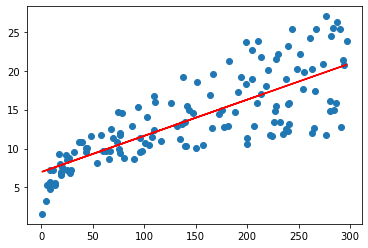

In [235]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9897 + 0.0465*X_train, 'r')
plt.show()

### Model Evaluation

#### Residual analysis
To validate assumptions of the model, and hence the reliability for inference

In [236]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)  # print the value of residual based on prediction.

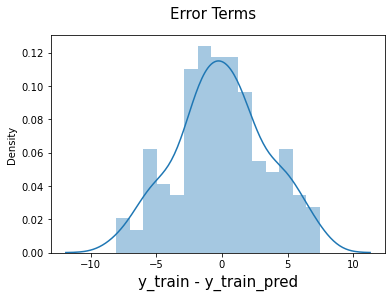

In [237]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

Looking for patterns in the residuals

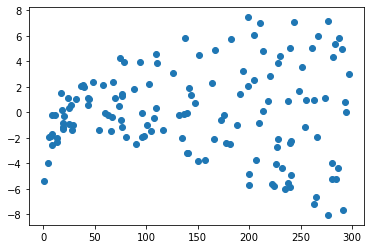

In [238]:
plt.scatter(X_train,res)
plt.show()   # patterns in the residuals in the form of scatter garph based on the predictions.

#### Predictions on the Test Set

In [239]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

In [240]:
# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [241]:
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

### Looking at the RMSE

In [242]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.8241456288327016

### Checking the R-squared on the test set

In [243]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.59429872677833

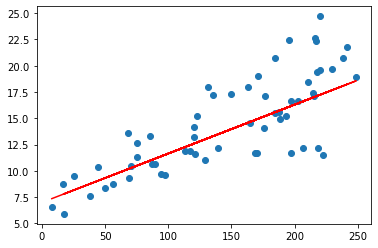

In [244]:
#Visualizing the fit on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9897 + 0.0465 * X_test, 'r')
plt.show()

the graph is scattered based on the predictions using the Tv Coefficients, R-Squared score, const variable and the sales.

### Save the model

In [258]:
import joblib
joblib.dump(y_pred,"inhouse_AdvertisingSales-Channel.pkl") # save the best model after prediction

['inhouse_AdvertisingSales-Channel.pkl']

### Loading the model

In [254]:
y_pred=joblib.load("inhouse_AdvertisingSales-Channel.pkl") # load the model.
#print(lr.predict(X_test_sm)) 